In [1]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matsim import *

In [3]:
exc = ShotNoiseConductance(
    rate=2.67,
    g_peak=0.0015,
    reversal=0,
    decay=3)

inh = ShotNoiseConductance(
    rate=3.73,
    g_peak=0.0015,
    reversal=-75,
    decay=10)

## Non-resetting MAT

In [15]:
RS = MATThresholds(
    alpha1=10,
    alpha2=2,
    tau1=10,
    tau2=200,
    omega=-80+15,
    refractory_period=2,
    resetting=False,
    name='RS')

neuron = Neuron(
    resting_potential=-80,
    membrane_resistance=50,
    membrane_capacitance=0.1,
    mats=[RS]
)

neuron.append_conductance(exc)
neuron.append_conductance(inh)

v_arr = []
t_arr = []
thr_arr = []

t = 0
dt = 0.1

while t < 1000:
    t += dt
    neuron.timestep(dt)
    v_arr.append(neuron.voltage)
    t_arr.append(t)
    thr_arr.append(RS.threshold)

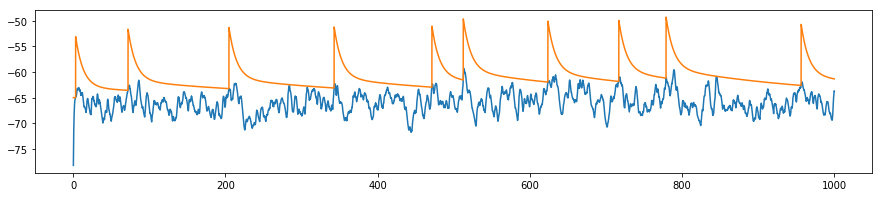

In [17]:
plt.figure(figsize=(15,3))
plt.plot(t_arr, v_arr)
plt.plot(t_arr, thr_arr)

## Resetting MAT

In [18]:
RS = MATThresholds(
    alpha1=10,
    alpha2=2,
    tau1=10,
    tau2=200,
    omega=-80+15,
    refractory_period=2,
    resetting=True,
    name='RS')

neuron = Neuron(
    resting_potential=-80,
    membrane_resistance=50,
    membrane_capacitance=0.1,
    mats=[RS]
)

neuron.append_conductance(exc)
neuron.append_conductance(inh)

v_arr = []
t_arr = []
thr_arr = []

t = 0
dt = 0.1

while t < 1000:
    t += dt
    neuron.timestep(dt)
    v_arr.append(neuron.voltage)
    t_arr.append(t)
    thr_arr.append(RS.threshold)

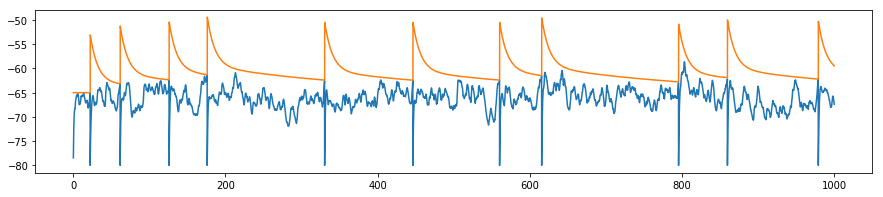

In [19]:
plt.figure(figsize=(15,3))
plt.plot(t_arr, v_arr)
plt.plot(t_arr, thr_arr)

## Hodgkin-Huxley

In [27]:
neuron = HHNeuron()

neuron.append_conductance(exc)
neuron.append_conductance(inh)

v_arr = []
t_arr = []
thr_arr = []

t = 0
dt = 0.01

while t < 1000:
    t += dt
    neuron.timestep(dt)
    v_arr.append(neuron.voltage)
    t_arr.append(t)

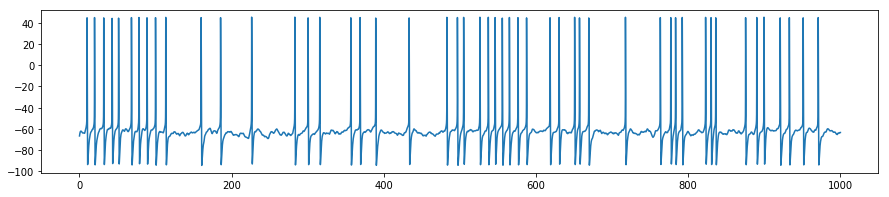

In [28]:
plt.figure(figsize=(15,3))
plt.plot(t_arr, v_arr)